In [130]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd 
from matplotlib.patches import Arc, Circle
import networkx as nx
import community
from matplotlib.patches import Circle, Rectangle, Arc
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
plt.style.use('seaborn-white')
from matplotlib.font_manager import FontProperties
from matplotlib import rcParams

In [3]:
gsw_pass_matrix = [[0,4.0,19.5,7.8,9.5], [4.6,0,6.2,2.2,2.8], [36.0,3.7,0,10.8,12.8], [3.6,2.6,7.8,0,6.6],
                  [13.0,2.2,12.8,6.3,0]]
gsw_pass = np.asarray(gsw_pass_matrix)
toronto_pass_matrix = [[0, 15.3, 14.5, 17.2, 5.7], [17.7, 0, 6.7, 8.8, 3.5], [18.7, 8.2, 0, 10.2, 2.2],[12.2, 8.8, 8, 0, 3.8], [8.2, 3.3, 2.7, 3.3, 0]]
toronto_pass = np.asarray(toronto_pass_matrix)
gsw_names = ['Curry', 'Looney', 'Green', 'Thompson', 'Iguodala']
toronto_names = ['Lowry', 'Siakam', 'Gasol', 'Leonard', 'Green']

In [160]:
mat1 = []
mat2 = []
for i in range(len(toronto_names)):
    for j in range(5):
        if toronto_pass[i][j] == 0:
            mat1.append([toronto_names[i], toronto_names[j], toronto_pass[i][j]])
        else:
            mat1.append([toronto_names[i], toronto_names[j], 1/toronto_pass[i][j]])

#For pagerank
for i in range(len(toronto_names)):
    for j in range(5):
        if toronto_pass[i][j] == 0:
            mat2.append([toronto_names[i], toronto_names[j], toronto_pass[i][j]])
        else:
            mat2.append([toronto_names[i], toronto_names[j], toronto_pass[i][j]])

In [161]:
H = nx.DiGraph()
H.add_nodes_from(toronto_names)
H.add_weighted_edges_from(mat1)

#For pagerank
I = nx.DiGraph()
I.add_nodes_from(toronto_names)
I.add_weighted_edges_from(mat2)

In [162]:
# Betweeness Centrality 
b_g = nx.betweenness_centrality(H, normalized=True, weight = 'weight')
b_g

{'Lowry': 1.0,
 'Siakam': 0.3333333333333333,
 'Gasol': 0.3333333333333333,
 'Leonard': 0.3333333333333333,
 'Green': 0.3333333333333333}

In [163]:
# Eigenvector Centrality
e_g = nx.eigenvector_centrality(H, max_iter=100, tol=1e-06, nstart=None, weight='weight')

In [164]:
# PageRank Centrality
p_g = nx.pagerank(I, weight = 'weight')

In [165]:
# Closeness Centrality
c_g = nx.closeness_centrality(H, distance='weight')

In [175]:
mat = []
mat0 = []
for i in range(len(gsw_names)):
    for j in range(5):
        if gsw_pass[i][j] == 0:
            mat.append([gsw_names[i], gsw_names[j], gsw_pass[i][j]])
        else:
            mat.append([gsw_names[i], gsw_names[j], 1/gsw_pass[i][j]])
for i in range(len(gsw_names)):
    for j in range(5):
        if gsw_pass[i][j] == 0:
            mat0.append([gsw_names[i], gsw_names[j], gsw_pass[i][j]])
        else:
            mat0.append([gsw_names[i], gsw_names[j], gsw_pass[i][j]])

In [176]:
G = nx.DiGraph()
G.add_nodes_from(gsw_names)
G.add_weighted_edges_from(mat)

F = nx.DiGraph()
F.add_nodes_from(gsw_names)
F.add_weighted_edges_from(mat0)

In [169]:
b_t = nx.betweenness_centrality(G, normalized=True, weight = 'weight')

In [170]:
#e_t = nx.eigenvector_centrality(G, max_iter=100, tol=1e-06, nstart=None, weight='weight')

In [177]:
p_t = nx.pagerank(F, weight = 'weight')

In [178]:
c_t = nx.closeness_centrality(G, distance='weight')

In [123]:
#fig, ax = plt.subplots(2, 2, sharey = True)
fig.suptitle('Golden State Warriors')
fig.subplots_adjust(wspace=0.4)
ax[0,0].barh(toronto_names, b_t.values(), color = '#1D428A', align = 'center')
ax[0,0].set(title = "Betweenness Centrality")
ax[0,1].barh(toronto_names, e_t.values(), color = '#FFC72C', align = 'center')
ax[1,0].barh(toronto_names, p_t.values(), color = '#26282A', align = 'center')
ax[1,0].set_xlim(0, 1)
ax[0,0].set_xlim(0, 1)
ax[0,1].set_xlim(0, 1)

(0, 1)

(0, 14)

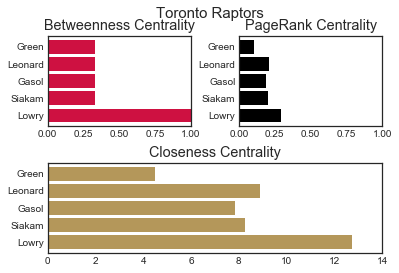

In [199]:
fig1 = plt.figure()
gs = gridspec.GridSpec(2, 4)
fig1.suptitle('Toronto Raptors', size = 15)
gs.update(wspace=1, hspace=0.4)
ax1 = plt.subplot(gs[0, :2], )
ax1.barh(toronto_names, b_g.values(), color = '#CE1141', align = 'center')
ax1.set(title = "Betweenness Centrality")
ax1.set_xlim(0,1)

ax2 = plt.subplot(gs[0, 2:])
ax2.barh(toronto_names, p_g.values(), color = '#000000', align = 'center')
ax2.set(title = "PageRank Centrality")
ax2.set_xlim(0,1)

ax3 = plt.subplot(gs[1, :])
ax3.set(title = "Closeness Centrality")
ax3.barh(toronto_names, c_g.values(), color = '#B4975A', align = 'center')
ax3.set_xlim(0,14)

(0, 14)

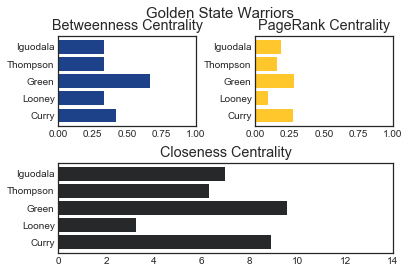

In [200]:
fig1 = plt.figure()
gs = gridspec.GridSpec(2, 4)
gs.update(wspace=1.5, hspace=0.4)
fig1.suptitle('Golden State Warriors', size = 15)
ax1 = plt.subplot(gs[0, :2], )
ax1.barh(gsw_names, b_t.values(), color = '#1D428A', align = 'center')
ax1.set(title = "Betweenness Centrality")
ax1.set_xlim(0,1)

ax2 = plt.subplot(gs[0, 2:])
ax2.barh(gsw_names, p_t.values(), color = '#FFC72C', align = 'center')
ax2.set(title = "PageRank Centrality")
ax2.set_xlim(0,1)

ax3 = plt.subplot(gs[1, :])
ax3.set(title = "Closeness Centrality")
ax3.barh(gsw_names, c_t.values(), color = '#26282A', align = 'center')
ax3.set_xlim(0,14)

(0, 1)

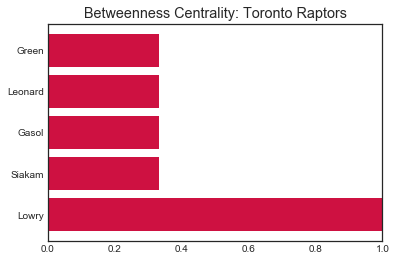

In [209]:
# Betweenness 
ax = plt.subplot(111)
ax.barh(toronto_names, b_g.values(), color = '#CE1141', align = 'center')
ax.set(title = "Betweenness Centrality: Toronto Raptors")
ax.set_xlim(0,1)

(0, 1)

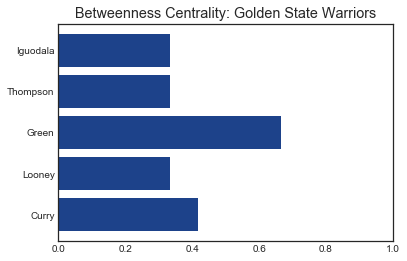

In [208]:
ax1 = plt.subplot(111)
ax1.barh(gsw_names, b_t.values(), color = '#1D428A', align = 'center')
ax1.set(title = "Betweenness Centrality: Golden State Warriors")
ax1.set_xlim(0,1)

(0, 1)

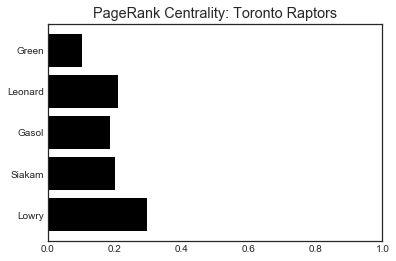

In [212]:
# Closeness 
ax = plt.subplot(111)
ax.barh(toronto_names, p_g.values(), color = '#000000', align = 'center')
ax.set(title = "PageRank Centrality: Toronto Raptors")
ax.set_xlim(0,1)

(0, 1)

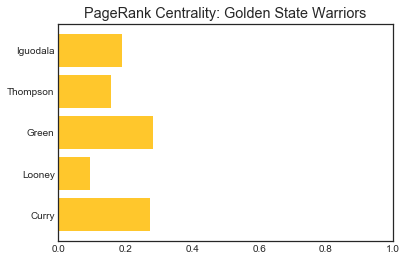

In [211]:
ax1 = plt.subplot(111)
ax1.barh(gsw_names, p_t.values(), color = '#FFC72C', align = 'center')
ax1.set(title = "PageRank Centrality: Golden State Warriors")
ax1.set_xlim(0,1)

(0, 14)

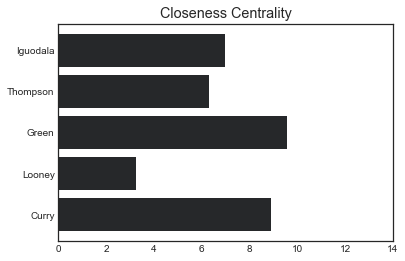

In [213]:
ax3 = plt.subplot(111)
ax3.set(title = "Closeness Centrality")
ax3.barh(gsw_names, c_t.values(), color = '#26282A', align = 'center')
ax3.set_xlim(0,14)

(0, 14)

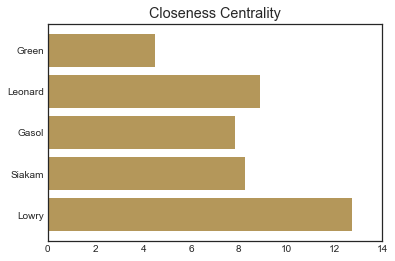

In [214]:
ax3 = plt.subplot(111)
ax3.set(title = "Closeness Centrality")
ax3.barh(toronto_names, c_g.values(), color = '#B4975A', align = 'center')
ax3.set_xlim(0,14)